#Upload the csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


#load and inspect data

In [ ]:
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Data Cleaning, Preprocessing, EDA & Visualization

##Remove ID column

In [ ]:
df.drop('id', axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##gender Analysis

In [ ]:
#check records in gender column
print(df['gender'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


* We have a 'other' gender and since there is only 1 instance we will remove it as to reduce the dimension of gender(Useful when encoding)

<Axes: ylabel='count'>

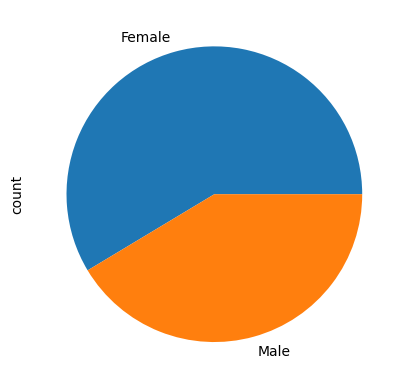

In [ ]:
#remove the 'other' gender instance
df['gender']=df['gender'].replace('Other','Female')

#plot the pie chart to see the distribution
df['gender'].value_counts().plot(kind='pie')

##bmi Analysis

<Axes: xlabel='bmi', ylabel='Count'>

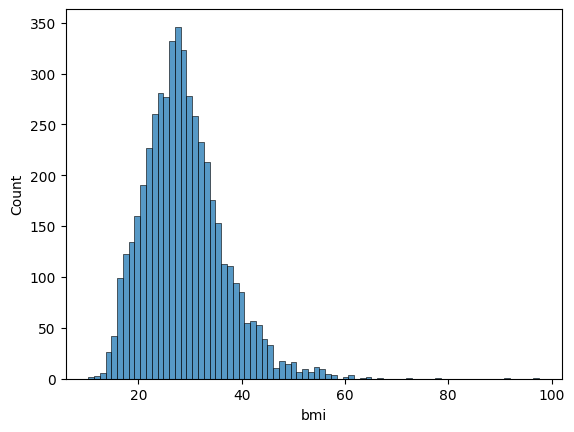

In [ ]:
import seaborn as sns

# Graphical representation of bmi attribute
sns.histplot(data=df['bmi'])

<Axes: ylabel='bmi'>

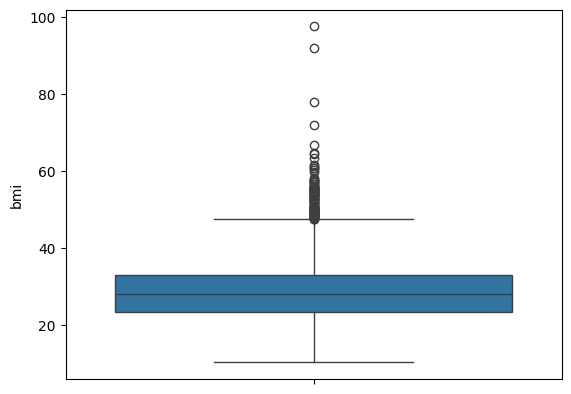

In [ ]:
sns.boxplot(data=df['bmi'])

* Based on the histogram and boxplot we see that there are many outliers in bmi

In [ ]:
# Finding the count of outliers based on those instances which are out of iqr
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

,count
bmi,
False,5000
True,110


* Total outliers in bmi : 110
* Total non-outliers in bmi : 5000





#Handle Missing values

In [ ]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
#Fill missing BMI values with median
df ['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [ ]:
#confirm the missing values are handled
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# Target feature Analysis - Stroke

<Axes: xlabel='stroke'>

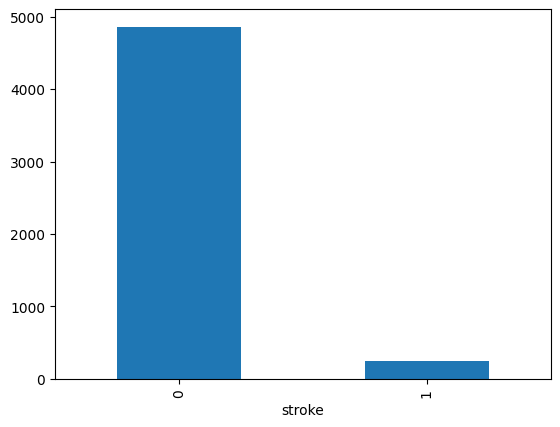

In [36]:
# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar")

#Encode categorical variables inorder to apply SMOTE

In [34]:
# Select categorical columns to encode
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("DataFrame after one-hot encoding:")
display(df.head())

DataFrame after one-hot encoding:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,False,True,False


#Split train/test to apply SMOTE to training set

In [35]:
from re import X
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply SMOTE

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

##Compare the imbalance after SMOTE

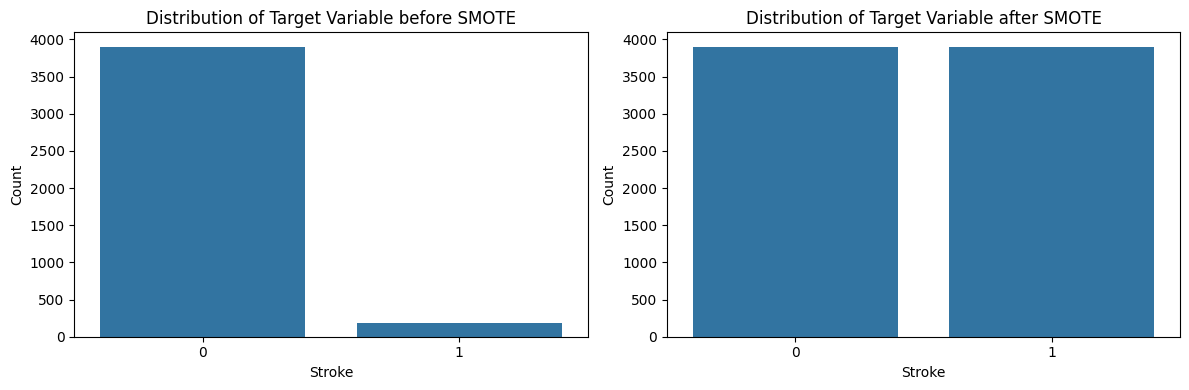

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the target variable before and after SMOTE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train) # Visualize before SMOTE
plt.title('Distribution of Target Variable before SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote) # Visualize after SMOTE
plt.title('Distribution of Target Variable after SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Count')

plt.tight_layout()
plt.show()